# Pre Process Weather Data 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt 

* Opening the weather dataset

In [117]:
WDf = pd.read_csv('./DataSets/Raw_Weather_DataSet.csv', header=0)
WDf.head()

,Time,station,name,hoehe,t,tp,rf,wr,wg,wsr,wsg,regen,ldred,ldstat,sonne
0,2021-01-26 00:00:00,11240,Graz/Flughafen,340,-3.1,-4.0,93.0,220.0,1.8,NaN,7.6,0.0,1010.3,965.2,0.0
1,2021-01-26 01:00:00,11240,Graz/Flughafen,340,-3.3,-3.9,96.0,360.0,3.6,NaN,5.4,0.0,1010.9,965.8,0.0
2,2021-01-26 02:00:00,11240,Graz/Flughafen,340,-2.8,-3.5,95.0,260.0,5.4,NaN,7.6,0.0,1011.1,966.0,0.0
3,2021-01-26 03:00:00,11240,Graz/Flughafen,340,-3.8,-4.2,97.0,180.0,5.4,NaN,7.6,0.0,1011.4,966.2,0.0
4,2021-01-26 04:00:00,11240,Graz/Flughafen,340,-4.7,-5.3,96.0,280.0,1.8,NaN,9.4,0.0,1012.0,966.6,0.0


In [118]:
WDf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6698 entries, 0 to 6697
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     6698 non-null   object 
 1   station  6698 non-null   int64  
 2   name     6698 non-null   object 
 3   hoehe    6698 non-null   int64  
 4   t        6697 non-null   float64
 5   tp       6698 non-null   float64
 6   rf       6697 non-null   float64
 7   wr       6621 non-null   float64
 8   wg       6697 non-null   float64
 9   wsr      0 non-null      float64
 10  wsg      6697 non-null   float64
 11  regen    6243 non-null   float64
 12  ldred    6697 non-null   float64
 13  ldstat   6697 non-null   float64
 14  sonne    6697 non-null   float64
dtypes: float64(11), int64(2), object(2)
memory usage: 785.0+ KB


In [119]:
WDf.columns

Index(['Time', 'station', 'name', 'hoehe', 't', 'tp', 'rf', 'wr', 'wg', 'wsr',
       'wsg', 'regen', 'ldred', 'ldstat', 'sonne'],
      dtype='object')

In [120]:
print(type(WDf['Time']))

<class 'pandas.core.series.Series'>


## Changin string timestamp

To work easier and better we convert the timestamp string into a datetime type objetc

In [121]:
from datetime import datetime as dt 
def Convertstr2dt(data,col): 
    dates=[]
    for str_date in data[col]: 
        dti = dt.strptime(str_date, "%Y-%m-%d %H:%M:%S")
        dates.append(dti)
   
    #Delete the old column
    data.drop(col, inplace = True, axis=1) 

    #Insert the newone
    data.insert(0, col,dates)
    return data

WDf = Convertstr2dt(WDf,'Time')

## Plots

### Temperature of a year

In order to set the xticks labels we've develop a function to save the first sample's index of each month

In [122]:
def DetectMonthChange(df,col):
    MChangeidx = [] 
    MonthNames = []
    Month=[]
    
    for idx,value in enumerate(df[col]):
        if Month and (Month[-1] != value.month):  #We compare with the last one to only save the changes
            MChangeidx.append(idx)
            Month.append(value.month)
            MonthNames.append(value.strftime("%B"))
        elif not MChangeidx:  #The firs time that we append a value
            MChangeidx.append(idx)
            Month.append(value.month)
            MonthNames.append(value.strftime("%B"))
    
    return MChangeidx, MonthNames  

In [123]:
idx,MonthNames=DetectMonthChange(WDf,'Time')
print(idx)
print(MonthNames)

[0, 144, 813, 1556, 2262, 3005, 3725, 4446, 5190, 5909, 6627]
['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']


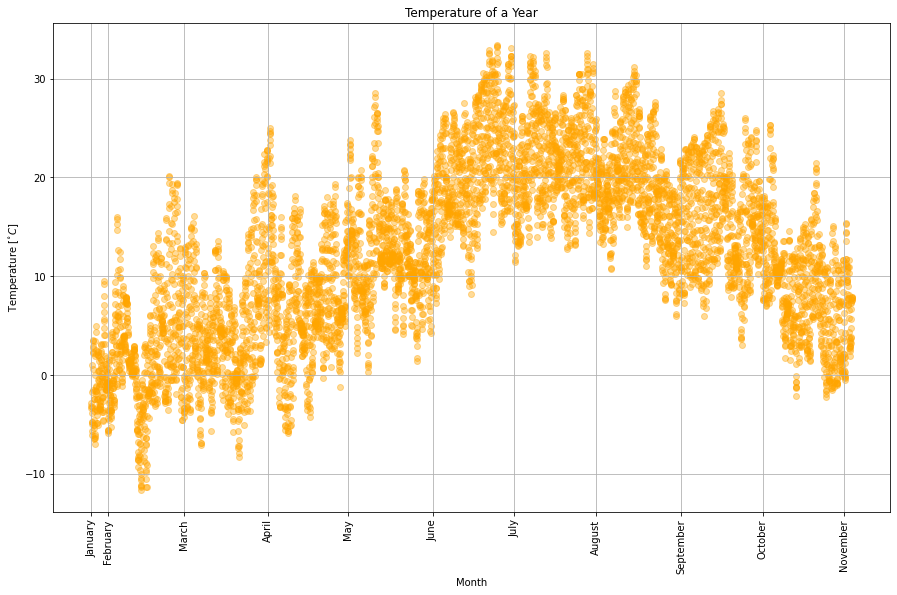

In [124]:
fig = plt.figure(figsize=(15,9))

plt.scatter(WDf.index,WDf['t'],alpha=0.4,color="orange")

plt.grid() 
plt.title("Temperature of a Year")
plt.xlabel('Month')
plt.ylabel("Temperature " + r'$[^{\circ} C]$')

plt.xticks(idx,MonthNames,rotation=90)
plt.savefig("./Imgs/Weather_year.png",transparent=True)

### Temperature of a week

In [125]:
def DetectDayChange(df,col,MonthNum,All):
    DChangeidx = [] 
    DNames = []
    Days=[]
    x = [] 
    y = [] 
    
    for idx,value in enumerate(df[col]):
        if not All: 
            if len(Days) ==7: 
                break
        if Days and (Days[-1] != value.day) :  #We compare with the last one to only save the changes
            DChangeidx.append(idx) 
            Days.append(value.day)
            DNames.append(value.strftime("%A"))
        elif not Days:  #The firs time that we append a value
            DChangeidx.append(idx)
            Days.append(value.day)
            DNames.append(value.strftime("%A"))
    
    return DChangeidx,DNames  

In [126]:
def PlotWeek(df, MonthNum,year=2021,All=False): 
    
    DayChangeidx,Weekdays = DetectDayChange(df,'Time',2,All)
    fig=plt.figure(figsize=(15,8))
    plt.grid()
    plt.xticks(DayChangeidx,Weekdays ,rotation=90)
    plt.title("Temperature - Week of month " + str(MonthNum))
    plt.xticks()
    #plt.scatter(y,x,alpha=1,color='#FFC300',lw=1.5)
    #plt.plot(y,x,alpha=0.8, color='blue', lw="0.75",linestyle=":")

    plt.plot(df['t'][:(DayChangeidx[-1])].index,df['t'][:(DayChangeidx[-1])],alpha=0.8, color='orange', lw="0.75",linestyle="--", marker="o",markersize=8)
    plt.ylabel("Temperature " + r'$[^{\circ} C]$')
    plt.savefig("./Imgs/Temperature_month" + str(MonthNum)+".png",transparent=True)

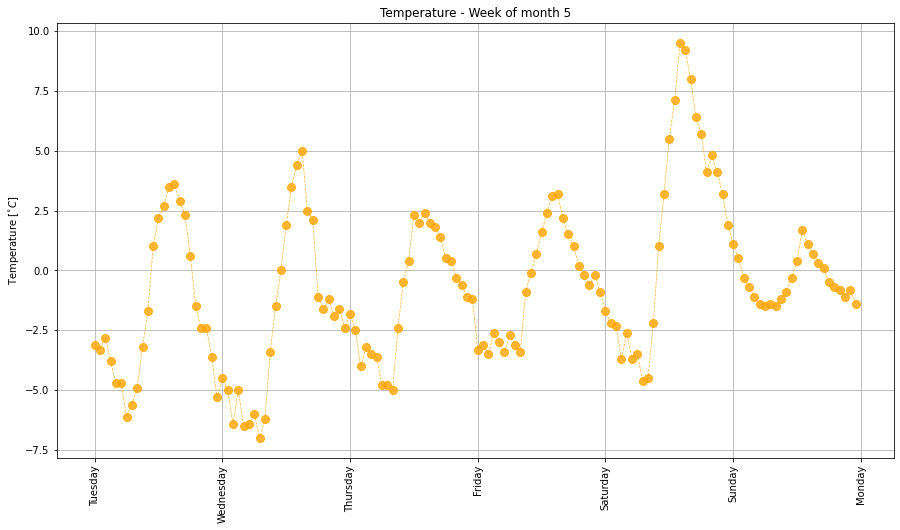

In [127]:
PlotWeek(WDf,5)

### Temperature of a day

In [139]:
def Plotday(df,day, MonthNum,year=2021): 
    x = []
    y = [] 

    for idx,value in enumerate(df["Time"]):
        if value.month == MonthNum and value.day == day: 
            x.append(df["t"][idx])
            y.append(value.hour)
            #print(value.hour)
            
    if not x and not y: 
        print("Missing day")
        return -1 
    
    fig=plt.figure(figsize=(15,8))
    plt.grid()
    plt.title("Daily Weather" + ": " + str(day) + "/" + str(MonthNum))
    plt.plot(y,x,alpha=0.8, color='orange', lw="0.75",linestyle="--", marker="o",markersize=8)
    plt.xlabel("Hour")
    plt.ylabel("Energy KWh")
   
    plt.savefig("./Imgs/Temperature_daily" + str(day)+ "_"+ str(MonthNum)+ ".png",transparent=True)

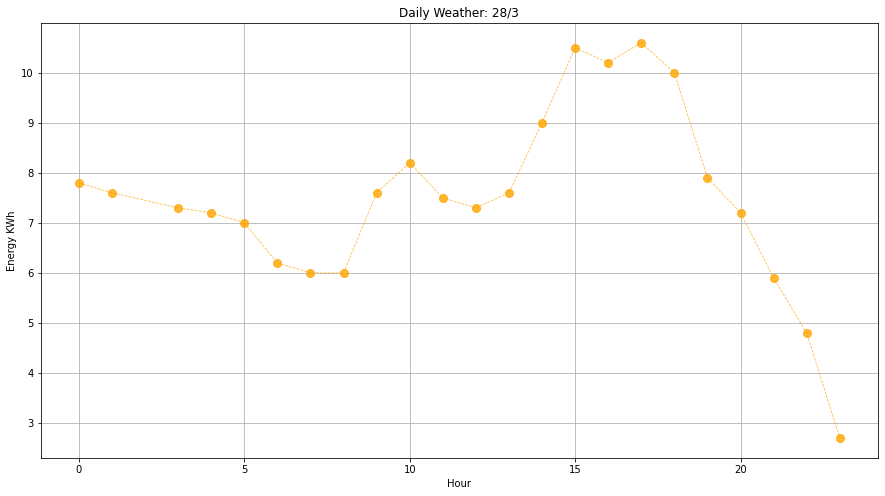

In [140]:
Plotday(WDf,28,3)

### Index Matching between Energy dataset and weather 

* Open the Energy Usage Data Set

In [141]:
Energy_df= pd.read_csv('./DataSets/PreProcessed_EnergyConsumption.csv', header=0)
Energy_df

,Time,Energy Usage
0,2021-01-27 11:00:00,8.03
1,2021-01-27 12:00:00,6.85
2,2021-01-27 13:00:00,8.86
3,2021-01-27 14:00:00,7.37
4,2021-01-27 15:00:00,7.67
...,...,...
6721,2021-11-03 12:00:00,6.68
6722,2021-11-03 13:00:00,7.26
6723,2021-11-03 14:00:00,6.81
6724,2021-11-03 15:00:00,8.81


* Open the Weather Data Set 

    We reopen it cause we'll work with merge,that use strings in order to match the elements (and not datetime objects) 

In [142]:
WDf = pd.read_csv('./DataSets/Raw_Weather_DataSet.csv', header=0)
WDf.head()

,Time,station,name,hoehe,t,tp,rf,wr,wg,wsr,wsg,regen,ldred,ldstat,sonne
0,2021-01-26 00:00:00,11240,Graz/Flughafen,340,-3.1,-4.0,93.0,220.0,1.8,NaN,7.6,0.0,1010.3,965.2,0.0
1,2021-01-26 01:00:00,11240,Graz/Flughafen,340,-3.3,-3.9,96.0,360.0,3.6,NaN,5.4,0.0,1010.9,965.8,0.0
2,2021-01-26 02:00:00,11240,Graz/Flughafen,340,-2.8,-3.5,95.0,260.0,5.4,NaN,7.6,0.0,1011.1,966.0,0.0
3,2021-01-26 03:00:00,11240,Graz/Flughafen,340,-3.8,-4.2,97.0,180.0,5.4,NaN,7.6,0.0,1011.4,966.2,0.0
4,2021-01-26 04:00:00,11240,Graz/Flughafen,340,-4.7,-5.3,96.0,280.0,1.8,NaN,9.4,0.0,1012.0,966.6,0.0


In [143]:
dfMerge = pd.merge(left=Energy_df,right=WDf, how='left', left_on='Time', right_on='Time')
dfMerge

,Time,Energy Usage,station,name,hoehe,t,tp,rf,wr,wg,wsr,wsg,regen,ldred,ldstat,sonne
0,2021-01-27 11:00:00,8.03,11240.0,Graz/Flughafen,340.0,0.0,-3.8,75.0,130.0,3.6,NaN,7.6,0.0,1018.4,973.5,93.0
1,2021-01-27 12:00:00,6.85,11240.0,Graz/Flughafen,340.0,1.9,-3.3,68.0,150.0,5.4,NaN,9.4,0.0,1017.7,973.1,66.0
2,2021-01-27 13:00:00,8.86,11240.0,Graz/Flughafen,340.0,3.5,-2.8,63.0,190.0,7.6,NaN,11.2,0.0,1016.8,972.5,100.0
3,2021-01-27 14:00:00,7.37,11240.0,Graz/Flughafen,340.0,4.4,-5.3,49.0,120.0,9.4,NaN,14.8,0.0,1016.3,972.1,99.0
4,2021-01-27 15:00:00,7.67,11240.0,Graz/Flughafen,340.0,5.0,-7.6,40.0,150.0,5.4,NaN,11.2,0.0,1015.5,971.5,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6721,2021-11-03 12:00:00,6.68,11240.0,Graz/Flughafen,340.0,5.7,4.7,93.0,140.0,5.4,NaN,11.2,0.0,1008.5,964.9,0.0
6722,2021-11-03 13:00:00,7.26,11240.0,Graz/Flughafen,340.0,6.7,5.2,90.0,70.0,5.4,NaN,13.0,0.0,1007.7,964.3,0.0
6723,2021-11-03 14:00:00,6.81,11240.0,Graz/Flughafen,340.0,7.3,5.9,91.0,80.0,3.6,NaN,9.4,0.0,1006.8,963.6,0.0
6724,2021-11-03 15:00:00,8.81,11240.0,Graz/Flughafen,340.0,7.4,6.4,93.0,300.0,3.6,NaN,5.4,0.0,1006.7,963.5,0.0


### Replacing the missing values or NanValues 

After the merging, it's probably that some values of the temperature data set are missing

* Check if we have any Null Value (double check) 

In [144]:
dfMerge['t'].all()

False

In [145]:
dfMerge.interpolate(method='linear',aixs=1, inplace=True) #or ffil 
dfMerge

,Time,Energy Usage,station,name,hoehe,t,tp,rf,wr,wg,wsr,wsg,regen,ldred,ldstat,sonne
0,2021-01-27 11:00:00,8.03,11240.0,Graz/Flughafen,340.0,0.0,-3.8,75.0,130.0,3.6,NaN,7.6,0.0,1018.4,973.5,93.0
1,2021-01-27 12:00:00,6.85,11240.0,Graz/Flughafen,340.0,1.9,-3.3,68.0,150.0,5.4,NaN,9.4,0.0,1017.7,973.1,66.0
2,2021-01-27 13:00:00,8.86,11240.0,Graz/Flughafen,340.0,3.5,-2.8,63.0,190.0,7.6,NaN,11.2,0.0,1016.8,972.5,100.0
3,2021-01-27 14:00:00,7.37,11240.0,Graz/Flughafen,340.0,4.4,-5.3,49.0,120.0,9.4,NaN,14.8,0.0,1016.3,972.1,99.0
4,2021-01-27 15:00:00,7.67,11240.0,Graz/Flughafen,340.0,5.0,-7.6,40.0,150.0,5.4,NaN,11.2,0.0,1015.5,971.5,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6721,2021-11-03 12:00:00,6.68,11240.0,Graz/Flughafen,340.0,5.7,4.7,93.0,140.0,5.4,NaN,11.2,0.0,1008.5,964.9,0.0
6722,2021-11-03 13:00:00,7.26,11240.0,Graz/Flughafen,340.0,6.7,5.2,90.0,70.0,5.4,NaN,13.0,0.0,1007.7,964.3,0.0
6723,2021-11-03 14:00:00,6.81,11240.0,Graz/Flughafen,340.0,7.3,5.9,91.0,80.0,3.6,NaN,9.4,0.0,1006.8,963.6,0.0
6724,2021-11-03 15:00:00,8.81,11240.0,Graz/Flughafen,340.0,7.4,6.4,93.0,300.0,3.6,NaN,5.4,0.0,1006.7,963.5,0.0


### Deleting the usefulless column 

In [146]:
dfMerge.drop('station', inplace = True, axis=1) 
dfMerge.drop('name', inplace = True, axis=1) 
dfMerge.drop('hoehe', inplace = True, axis=1) 

In [147]:
def SaveDataFrame(data, name): 
    data.to_csv(name,index=False)
    return

In [148]:
SaveDataFrame(dfMerge,"./DataSets/PreProcessed_EnergyConsumption_WeatherData.csv")